# Importing 

In [ ]:
# General packages
import os
import glob
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import tqdm
from time import time
# %matplotlib inline

# Sklearn packages
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Torch 
import torch
import torchvision
import torch.nn as nn
from torch.utils import data
from torchvision import transforms
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

# Tensor

In [ ]:
# Creating a tensor
myTensor = torch.tensor([1, 2.5, -3, 4])
myTensor

tensor([ 1.0000,  2.5000, -3.0000,  4.0000])

In [ ]:
# Tensor --> Numpy
myTensor.numpy()

array([ 1. ,  2.5, -3. ,  4. ], dtype=float32)

In [ ]:
# Numpy --> Tensor
myArr = np.array([1.1, 2, 3.6])
myTensor = torch.from_numpy(myArr)
myTensor

tensor([1.1000, 2.0000, 3.6000], dtype=torch.float64)

In [ ]:
# Changging tensor's dtype
myTensor.int()

tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
myTensor.to(dtype=torch.int64)

tensor([1, 2, 3])

# Device



*   CPU
*   Cuda



In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
myTensor = myTensor.to(device)
myTensor.device

device(type='cpu')

# Neural Network Modules

In [ ]:
# The batch size defines the number of samples that will be propagated through the network.
batchSize = 10

## Linear layers


### Parameters

*   in_features – size of each input sample
*   out_features – size of each output sample
*    bias – If set to False, the layer will not learn an additive bias. Default: True

$$ y= x A^T + b $$

In [ ]:
M = nn.Linear(16, 32)
M

Linear(in_features=16, out_features=32, bias=True)

In [ ]:
x = torch.randn(batchSize, 16)
# x
print(x.shape)
y = M(x)
print(y.shape)

torch.Size([10, 16])
torch.Size([10, 32])


## Identity layers

A placeholder identity operator that is argument-insensitive.

In [ ]:
M = nn.Identity()
M

Identity()

In [ ]:
y = M(x)
(y == x).all()

tensor(True)

## Convolution layers

Applies a 2D convolution over an input signal composed of several input planes.

### Parameters

* in_channels (int) – Number of channels in the input image
* out_channels (int) – Number of channels produced by the convolution
* kernel_size (int or tuple) – Size of the convolving kernel
* stride (int or tuple, optional) – Stride of the convolution. Default: 1
* padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0
* padding_mode (string, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'
* dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1
* groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1
* bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

[Link for more](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)

In [ ]:
M = nn.Conv2d(16, 32, 3, stride=2, padding=1)
M

Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))

$$ H_{out} = ⌊\frac{H_{in} + 2 × padding[0] - dilation[0] × (kernel[0]-1) - 1}{stride[0]} ⌋ + 1 $$

$$ W_{out} = ⌊\frac{W_{in} + 2 × padding[1] - dilation[1] × (kernel[1]-1) - 1}{stride[1]} ⌋ + 1 $$

In [ ]:
x = torch.randn(batchSize, 16, 256, 256)
y = M(x)
y.shape

torch.Size([10, 32, 128, 128])

# Activation layers

The most important feature in an activation function is its ability to add non-linearity into a neural network. 

* Activation for Hidden Layers:
  1.   Rectified Linear Activation (ReLU)
  2. Logistic (Sigmoid)
  3. Hyperbolic Tangent (Tanh)

* Activation for Output Layers
  1. Linear
  2. Logistic (Sigmoid)
  3. Softmax


[Link for more](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=Activation%20functions%20are%20a%20critical,predictions%20the%20model%20can%20make.)





## ReLU

$$ y = max(0,x) $$ 

In [ ]:
M = nn.ReLU()
M

ReLU()

In [ ]:
x = torch.tensor([1, 2.5, -3, 4])
y = M(x)
y

tensor([1.0000, 2.5000, 0.0000, 4.0000])

## Sigmoid

$$ y = \frac{1}{1+e^{-x}} $$

In [ ]:
M = nn.Sigmoid()
M

Sigmoid()

In [ ]:
x = torch.tensor([1, 2.5, -3, 4])
y = M(x)
y

tensor([0.7311, 0.9241, 0.0474, 0.9820])

# Softmax

$$ σ(z)_{i} = \frac{e^{z_i}}{Σ_{j=1}^{K} e^{z_j}} $$

In [ ]:
M = nn.Softmax(dim=-1)
M

Softmax(dim=-1)

In [ ]:
x = torch.tensor([1, 2.5, -3, 4])
y = M(x)
y

tensor([3.9085e-02, 1.7516e-01, 7.1586e-04, 7.8503e-01])

## Tanh

$$ Tanh(x)= \frac{e^x-e^{-x}}{e^x+e^{-x}} $$

In [ ]:
M = nn.Tanh()
M

Tanh()

In [ ]:
x = torch.tensor([1, 2.5, -3, 4])
y = M(x)
y

tensor([ 0.7616,  0.9866, -0.9951,  0.9993])

# Pooling layers

A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity (e.g. ReLU) has been applied to the feature maps output by a convolutional layer. 

Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network.

[Link for more](https://pytorch.org/docs/stable/nn.html#pooling-layers)

## Max Pooling

Calculate the maximum value for each patch of the feature map.

In [ ]:
M = nn.MaxPool2d(2, 2)
M

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [ ]:
x = torch.randn(batchSize, 16, 128, 128)
y = M(x)
y.shape

torch.Size([10, 16, 64, 64])

## Average Pooling

Calculate the average value for each patch on the feature map.

In [ ]:
M = nn.AvgPool2d(2, 2)
M

AvgPool2d(kernel_size=2, stride=2, padding=0)

In [ ]:
y = M(x)
y.shape

torch.Size([10, 16, 64, 64])

## Adaptive Max Pooling

Applies a 2D adaptive max pooling over an input signal composed of several input planes.

In [ ]:
M = nn.AdaptiveMaxPool2d((1, 1))
M

AdaptiveMaxPool2d(output_size=(1, 1))

In [ ]:
y = M(x)
y.shape

torch.Size([10, 16, 1, 1])

# Normalization layers

[Link for more](https://pytorch.org/docs/stable/nn.html#normalization-layers)

## Batch normalization

Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers. The activations scale the input layer in normalization. Using batch normalization learning becomes efficient also it can be used as regularization to avoid overfitting of the model.

In [ ]:
M = nn.BatchNorm1d(16)
M

BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
x = torch.randn(batchSize, 16)
y = M(x)
y.shape

torch.Size([10, 16])

In [ ]:
M = nn.BatchNorm2d(16)
M

BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
x = torch.randn(batchSize, 16, 128, 128)
y = M(x)
y.shape

torch.Size([10, 16, 128, 128])

# Dropout

Dropouts are the regularization technique that is used to prevent overfitting in the model. Dropouts are added to randomly switching some percentage of neurons of the network. When the neurons are switched off the incoming and outgoing connection to those neurons is also switched off. This is done to enhance the learning of the model. Dropouts are usually advised not to use after the convolution layers, they are mostly used after the dense layers of the network. 

[Link for more](https://pytorch.org/docs/stable/nn.html#dropout-layers)

In [ ]:
M = nn.Dropout(p = 0.3)
M

Dropout(p=0.3, inplace=False)

In [ ]:
x = torch.randn(batchSize, 64)
y = M(x)
y.shape, (y == 0).sum(dim=-1)

(torch.Size([10, 64]), tensor([16, 21, 26, 27, 18, 19, 18, 19, 19, 26]))

In [ ]:
M = nn.Dropout2d(p = 0.5)
M

Dropout2d(p=0.5, inplace=False)

In [ ]:
x = torch.randn(batchSize, 64, 32, 32)
y = M(x)
y.shape, (y.flatten(2).sum(-1) == 0).sum(-1)

(torch.Size([10, 64, 32, 32]),
 tensor([32, 34, 35, 28, 31, 35, 35, 35, 33, 29]))

# Loss functions

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs.

[Link for more](https://pytorch.org/docs/stable/nn.html#loss-functions)

## MSE

Mean squared error (MSE) is the most commonly used loss function for regression. The loss is the mean overseen data of the squared differences between true and predicted values.

In [ ]:
loss = nn.MSELoss()
loss

MSELoss()

In [ ]:
x = torch.randn(batchSize, 16)
y = torch.randn(batchSize, 16)
loss(x, y), F.mse_loss(x, y)

(tensor(2.1907), tensor(2.1907))

## Cross Entropy

Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

$$ H (P, Q) = \; – Σ_{x \; in \; X} P(x) × log(Q(x)) $$

[Link for more](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

In [ ]:
loss = nn.CrossEntropyLoss()
loss

CrossEntropyLoss()

In [ ]:
# This MUST contain scores (logits), not probabilities. So, you shouldn't use SoftMax to calculate multiclass cross-entropy. because the function applies the softmax itself.
x = torch.randn(batchSize, 16)     
y = torch.randn(batchSize, 16)
loss(x, y), F.cross_entropy(x, y)

(tensor(2.7850), tensor(2.7850))

Putting Modules Together

In [ ]:
M = nn.Sequential(          # B 16
    nn.Linear(in_features = 16, out_features = 256),     # B 256
    nn.ReLU(),
    nn.BatchNorm1d(num_features = 256),
    nn.Linear(in_features = 256, out_features = 1),      # B 1
    nn.Sigmoid(),
    nn.Flatten(0)           # B
)
M

Sequential(
  (0): Linear(in_features=16, out_features=256, bias=True)
  (1): ReLU()
  (2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Linear(in_features=256, out_features=1, bias=True)
  (4): Sigmoid()
  (5): Flatten(start_dim=0, end_dim=-1)
)

In [ ]:
x = torch.randn(batchSize, 16)
y = M(x)
y

tensor([0.4722, 0.4281, 0.4448, 0.4765, 0.4655, 0.2912, 0.4909, 0.7542, 0.5149,
        0.5474], grad_fn=<ReshapeAliasBackward0>)

## Define a module

In [ ]:
class Net(nn.Module): 

    def __init__(self, in_features: int, num_classes: int):
        super().__init__()
        self.lin1 = nn.Linear(in_features = in_features, out_features = 256)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(in_features = 256, out_features = num_classes)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x: B  I
        x = self.lin1(x)    # B 256
        x = self.relu(x)    # B 256
        x = self.lin2(x)    # B C
        return x

In [ ]:
net = Net(16, 4)
net.eval()

Net(
  (lin1): Linear(in_features=16, out_features=256, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=256, out_features=4, bias=True)
)

In [ ]:
x = torch.randn(batchSize, 16)
o = net(x)
o

tensor([[ 0.1257, -0.1486,  0.5280,  0.0834],
        [ 0.2643,  0.1749, -0.7724,  0.1842],
        [ 0.2285,  0.0449, -0.1685, -0.2249],
        [-0.0491, -0.1972,  0.2131, -0.0878],
        [ 0.0869, -0.3329, -0.0558, -0.1607],
        [ 0.0282, -0.1797, -0.3280, -0.0576],
        [ 0.4027,  0.2354, -0.3181,  0.1195],
        [ 0.0213, -0.1148, -0.2188,  0.0052],
        [ 0.7971, -0.8762, -0.0063, -0.1093],
        [ 0.1741,  0.0954,  0.2499, -0.2546]], grad_fn=<AddmmBackward0>)

In [ ]:
y = torch.randn(batchSize, 4).argmax(-1)
y

tensor([1, 0, 1, 1, 3, 0, 0, 2, 2, 2])

In [ ]:
criterion = nn.CrossEntropyLoss()
criterion

CrossEntropyLoss()

In [ ]:
loss = criterion(o, y)
loss

tensor(1.3838, grad_fn=<NllLossBackward0>)

In [ ]:
net.lin1.weight.grad

In [ ]:
loss.backward()
net.lin1.weight.grad

tensor([[ 4.0466e-03, -4.2797e-03, -2.1860e-05,  ...,  9.9314e-04,
         -7.8819e-03, -3.1721e-03],
        [ 9.7097e-04, -6.2181e-03, -1.9447e-07,  ...,  1.1302e-02,
          2.1152e-03,  9.5713e-03],
        [-9.7078e-03,  1.0379e-02, -8.3692e-03,  ...,  1.3334e-03,
          1.3270e-02, -6.3845e-03],
        ...,
        [-2.9845e-03,  1.4671e-02,  1.5405e-02,  ...,  2.4478e-03,
         -1.7489e-02, -2.4506e-03],
        [ 1.0637e-02, -7.2977e-03, -6.8045e-03,  ..., -1.1330e-02,
          1.4466e-02,  2.9236e-03],
        [ 4.8928e-03, -5.7881e-03, -1.0807e-02,  ..., -3.9286e-03,
          5.5728e-03, -1.6212e-03]])

In [ ]:
# zero the parameter gradients
net.zero_grad()
net.lin1.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# Hooking for visualising and debugging

A hook is basically a function that is executed when the either forward or backward is called.

1.   The Forward Hook
2.   The Backward Hook



In [ ]:
x = torch.tensor([0., 0., 0.], requires_grad=True)
# double the gradient
handle = x.register_hook(lambda grad: grad * 2)
x.backward(torch.tensor([1., 2., 3.]))
x.grad

tensor([2., 4., 6.])

In [ ]:
handle.remove()

## Forward Hook

Change output of a layer

In [ ]:
handle = net.lin2.register_forward_hook(lambda m, i, o: torch.zeros_like(o))

In [ ]:
x = torch.randn(batchSize, 16)
y = net(x)
y

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
handle.remove()

# Backward Hook

In [ ]:
grad_in = None
grad_out = None
def catch_grad(m, g_in, g_out):
    global grad_in, grad_out
    grad_in = g_in
    grad_out = g_out

In [ ]:
handle = net.lin2.register_full_backward_hook(catch_grad)

In [ ]:
x = torch.randn(batchSize, 16)
o = net(x)
y = torch.randn(batchSize, 4).argmax(-1)

In [ ]:
loss = criterion(o, y)
loss.backward()

In [ ]:
grad_in[0]

tensor([[-3.3329e-03, -2.1783e-03,  4.1018e-03,  ...,  9.6945e-05,
          3.4603e-04,  1.6266e-03],
        [ 3.9661e-04,  6.7900e-03,  2.5259e-03,  ..., -2.4557e-03,
          2.3057e-03,  4.4749e-03],
        [ 1.4463e-03, -2.8742e-04, -3.2944e-03,  ...,  6.3021e-03,
         -5.6493e-03, -3.9143e-03],
        ...,
        [ 1.1422e-03, -2.2912e-04, -2.7664e-03,  ...,  5.9962e-03,
         -5.3375e-03, -3.4956e-03],
        [ 3.1753e-04,  7.3811e-03,  2.8776e-03,  ..., -2.4305e-03,
          2.3185e-03,  4.8688e-03],
        [ 1.3797e-03, -2.8318e-03, -2.8915e-03,  ..., -1.9383e-03,
          1.3474e-03, -2.0386e-03]])

In [ ]:
grad_out[0]

tensor([[ 0.0356,  0.0134,  0.0221, -0.0712],
        [ 0.0312,  0.0227, -0.0769,  0.0230],
        [ 0.0332, -0.0757,  0.0186,  0.0240],
        [-0.0727,  0.0243,  0.0257,  0.0227],
        [ 0.0237,  0.0291,  0.0245, -0.0773],
        [ 0.0351,  0.0239, -0.0836,  0.0246],
        [ 0.0263,  0.0199,  0.0296, -0.0758],
        [ 0.0358, -0.0711,  0.0172,  0.0182],
        [ 0.0380,  0.0225, -0.0831,  0.0226],
        [-0.0660,  0.0171,  0.0254,  0.0235]])

In [ ]:
handle.remove()

# Optimizers
Algorithms: 

1. SGD
2. Adam
3. Adagrad
4. Adamax
5. ...

[Link for more](https://machinelearningknowledge.ai/pytorch-optimizers-complete-guide-for-beginner/)



## Learning rate 

The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Choosing the learning rate is challenging as a value too small may result in a long training process that could get stuck, whereas a value too large may result in learning a sub-optimal set of weights too fast or an unstable training process.

Link for more [1](https://pytorch.org/docs/stable/optim.html), [2](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

[How to adjust learning rate](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate)

## Weight Decay

Weight decay is a regularization technique by adding a small penalty, usually the L2 norm of the weights (all the weights of the model), to the loss function. 

$$ loss = loss + weight\_decay \times L_2 \; norm \; of \; the \; weights $$

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0001
    maximize: False
    weight_decay: 0
)

In [ ]:
x = torch.randn(batchSize, 16)
o = net(x)
y = torch.randn(batchSize, 4).argmax(-1)

In [ ]:
net.lin1.weight

Parameter containing:
tensor([[ 0.0868,  0.0760,  0.1695,  ..., -0.1020,  0.2170, -0.1412],
        [ 0.2442, -0.0888,  0.0705,  ...,  0.0796, -0.0062,  0.0248],
        [ 0.0339,  0.0487,  0.0203,  ...,  0.0552, -0.1998,  0.1689],
        ...,
        [-0.2349,  0.1476, -0.0668,  ..., -0.1859, -0.0927, -0.0747],
        [ 0.0287, -0.1240,  0.1244,  ...,  0.2130, -0.0341, -0.0507],
        [ 0.0217, -0.1207,  0.1797,  ...,  0.1632, -0.1789,  0.0239]],
       requires_grad=True)

In [ ]:
loss = criterion(o, y)
loss

tensor(1.4421, grad_fn=<NllLossBackward0>)

In [ ]:
loss.backward()

In [ ]:
optimizer.step()
optimizer.zero_grad()

In [ ]:
net.lin1.weight

Parameter containing:
tensor([[ 0.0869,  0.0759,  0.1696,  ..., -0.1019,  0.2169, -0.1411],
        [ 0.2441, -0.0889,  0.0704,  ...,  0.0797, -0.0063,  0.0249],
        [ 0.0338,  0.0488,  0.0204,  ...,  0.0553, -0.1999,  0.1688],
        ...,
        [-0.2348,  0.1475, -0.0667,  ..., -0.1860, -0.0928, -0.0746],
        [ 0.0286, -0.1239,  0.1243,  ...,  0.2131, -0.0340, -0.0506],
        [ 0.0216, -0.1208,  0.1796,  ...,  0.1633, -0.1790,  0.0238]],
       requires_grad=True)

# Scheduler

Scheduler provides several methods to adjust the learning rate based on the number of epochs.

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
optimizer
lr=optimizer.param_groups[0]["lr"];
lr

0.0001

In [ ]:
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
scheduler

In [ ]:
optimizer.step()
scheduler.step()
lr=optimizer.param_groups[0]["lr"];
lr

9e-05

# Saving and Loading Model

In [ ]:
torch.save(net.state_dict(), 'net.pth')

In [ ]:
net.load_state_dict(torch.load('net.pth'))

<All keys matched successfully>

In [ ]:
net.state_dict()

# Train/Eval modes

model.train() tells your model that you are training the model. So effectively layers like dropout, batchnorm, etc which behave different on the train and test procedures know what is going on and hence can behave accordingly.



In [ ]:
net.train()

Net(
  (lin1): Linear(in_features=16, out_features=256, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=256, out_features=4, bias=True)
)

In [ ]:
net.eval()

Net(
  (lin1): Linear(in_features=16, out_features=256, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=256, out_features=4, bias=True)
)

## Example: CIFAR10 classification with a convolutional network

In [ ]:
import torchvision
from torchvision import transforms

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
train_size = int(0.9 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = torch.utils.data.random_split(trainset, (train_size, val_size))

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,shuffle=True, num_workers=2)
                                          
valloader = torch.utils.data.DataLoader(valset, batch_size=1024,shuffle=False, num_workers=2)
                                         

In [ ]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=1024,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

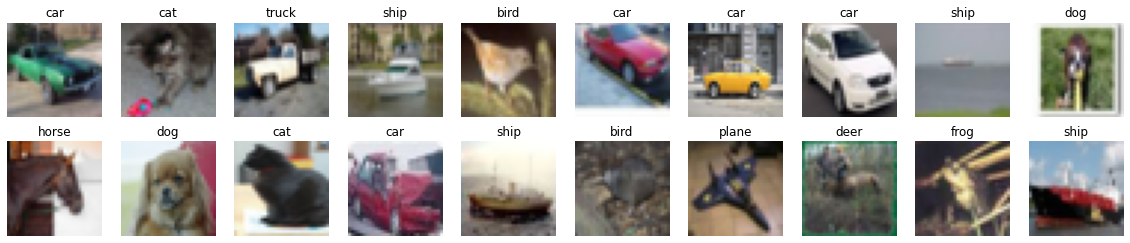

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 4))

for i in range(20):
    fig.add_subplot(2, 10, i + 1)
    image, label = trainset[i]
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.title(classes[label])
    plt.axis('off')

plt.show()

In [ ]:
class Cifar10Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(                                                            # B 3   32  32
            nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3, padding = 1 ),     # B 16  32  32
            nn.ReLU(),
            nn.Conv2d(in_channels = 16, out_channels = 16, kernel_size = 3, padding=1),       # B 16  32  32
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),                                        # B 16  16  16
            nn.Dropout2d(p = 0.2),
            nn.BatchNorm2d(num_features  = 16),
            nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3, padding=1),       # B 32  16  16
            nn.ReLU(),
            nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, padding=1),       # B 32  16  16
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2),                                        # B 32  8   8
            nn.Dropout2d(p = 0.2),
            nn.BatchNorm2d(num_features = 32),
        )
        self.fc = nn.Sequential(
            nn.Flatten(),                                                                     # B 2048
            nn.Linear(in_features = 2048, out_features = 10),                                 # B 10
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.conv(x)
        x = self.fc(x)
        return x

In [ ]:
net = Cifar10Net().to(device)
net

Cifar10Net(
  (conv): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.2, inplace=False)
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.2, inplace=False)
    (13): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=10, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)

In [ ]:
def train_epoch(net: nn.Module, criterion: nn.Module, optimizer: torch.optim.Optimizer, dataloader: torch.utils.data.DataLoader):
    epoch_loss = 0
    epoch_true = 0
    epoch_all = 0
    i = 0

    # Set model to training mode
    net.train()

    # zero the parameter gradients
    optimizer.zero_grad()

    with tqdm.tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for i, (x, y) in pbar: 

            # Transfer data to device
            x = x.to(device)  
            y = y.to(device)

            # forward
            p = net(x)

            # loss eval
            loss = criterion(p, y)
            epoch_loss += float(loss)

            # predict 
            predictions = p.argmax(-1)
            epoch_all += len(predictions)
            epoch_true += (predictions == y).sum()
            
            # Computes accuracy and loss
            pbar.set_description(f'Loss: {epoch_loss / (i + 1):.3e} - Acc: {epoch_true * 100. / epoch_all:.2f}%')

            # Backward the error
            loss.backward()
            optimizer.step()

            # zero the parameter gradients
            optimizer.zero_grad()

In [ ]:
def eval_epoch(net: nn.Module, criterion: nn.Module, dataloader: torch.utils.data.DataLoader):
    epoch_loss = 0
    epoch_true = 0
    epoch_all = 0
    i = 0

    # Set model to evaluate mode
    net.eval()

    with torch.no_grad(), tqdm.tqdm(enumerate(dataloader), total=len(dataloader)) as pbar:
        for i, (x, y) in pbar:

            # Transfer data to device
            x = x.to(device)
            y = y.to(device)

            # forward
            p = net(x)

            # loss eval
            loss = criterion(p, y)
            epoch_loss += float(loss)

            # predict 
            predictions = p.argmax(-1)
            epoch_all += len(predictions)
            epoch_true += (predictions == y).sum()

            # Computes accuracy and loss
            pbar.set_description(f'Loss: {epoch_loss / (i + 1):.3e} - Acc: {epoch_true * 100. / epoch_all:.2f}%')

In [ ]:
epochs = 10

for e in range(epochs):

    start_time = time()

    train_epoch(net, criterion, optimizer, trainloader)
    eval_epoch(net, criterion, valloader)

    end_time = time()

    print(f'Epoch {e+1:3} finished in {end_time - start_time:.2f}s')

Loss: 1.719e+00 - Acc: 39.18%: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

Epoch   1 finished in 70.57s



Loss: 1.564e+00 - Acc: 45.60%: 100%|██████████| 5/5 [00:03<00:00,  1.40it/s]

Epoch   2 finished in 71.73s



Loss: 1.454e+00 - Acc: 49.18%: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

Epoch   3 finished in 69.95s



Loss: 1.398e+00 - Acc: 51.26%: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

Epoch   4 finished in 69.90s



Loss: 1.341e+00 - Acc: 53.80%: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

Epoch   5 finished in 70.13s



Loss: 1.291e+00 - Acc: 55.44%: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

Epoch   6 finished in 70.99s



Loss: 1.268e+00 - Acc: 56.04%: 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

Epoch   7 finished in 70.29s



Loss: 1.224e+00 - Acc: 57.66%: 100%|██████████| 5/5 [00:03<00:00,  1.44it/s]

Epoch   8 finished in 70.28s



Loss: 1.198e+00 - Acc: 58.08%: 100%|██████████| 5/5 [00:03<00:00,  1.43it/s]

Epoch   9 finished in 69.95s



Loss: 1.175e+00 - Acc: 58.70%: 100%|██████████| 5/5 [00:03<00:00,  1.42it/s]

Epoch  10 finished in 71.05s


In [ ]:
torch.save(net.state_dict(), 'cifar10net.pth')

In [ ]:
eval_epoch(net, criterion, testloader)

Loss: 1.159e+00 - Acc: 59.72%: 100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


# Experiment Tracking

The process of setup is trivial. First sign-up for an account [here](https://neptune.ai/register), this will create a unique ID and dashboard where you can see all your experiments. You can always add your team members and collaborate on experiments. Follow [these steps](https://docs.neptune.ai/getting-started/installation) to get your unique id (to be used while setup).

# Some useful links



1.   [LEARN THE BASICS](https://pytorch.org/tutorials/beginner/basics/intro.html)
2.   [Machine Learning Mastery](https://machinelearningmastery.com/)
3.   [MODELS AND PRE-TRAINED WEIGHTS](https://pytorch.org/vision/stable/models.html)
4.   [TRANSFER LEARNING FOR COMPUTER VISION TUTORIAL](https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)
5.   [DEEP LEARNING WITH PYTORCH: A 60 MINUTE BLITZ](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)
6.  [TORCHVISION OBJECT DETECTION FINETUNING TUTORIAL](https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html)

